In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv('W:/anaconda/18-5-25/temp/krishnaik/data/height1weight2.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

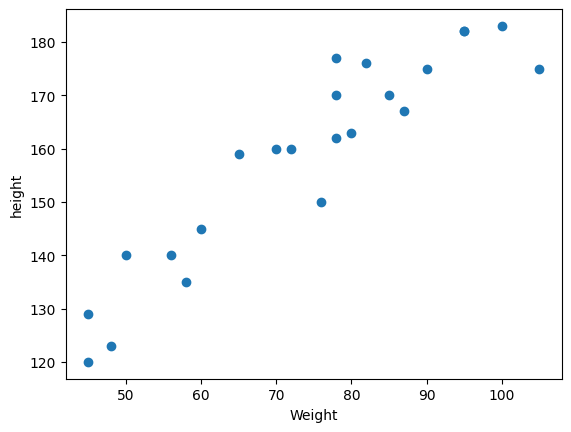

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')

In [6]:
from sklearn.model_selection import train_test_split




In [15]:
X=df[['Weight']]
y=df['Height']

In [16]:

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [20]:
Xtrain_scaled=scaler.fit_transform(Xtrain)
Xtest_scaled=scaler.transform(Xtest)

In [21]:
Xtrain_scaled,Xtest_scaled

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141],
        [-1.6641678 ],
        [-0.75546804],
        [-0.1496682 ],
        [ 0.21381171],
        [-1.36126788],
        [-0.99778797],
        [-0.02850823],
        [ 1.06193149],
        [ 0.57729161],
        [ 0.75903157],
        [ 0.88019153],
        [ 0.45613165]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]))

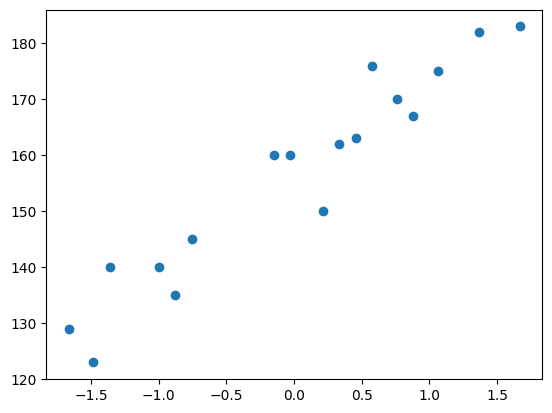

In [24]:
plt.scatter(Xtrain_scaled,ytrain)


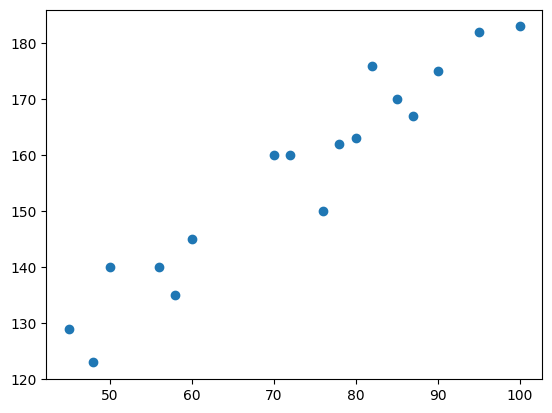

In [25]:
plt.scatter(Xtrain,ytrain)

In [26]:
## Train the model Simple linear regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linear_reg=LinearRegression()

In [29]:
linear_reg.fit(Xtrain_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
print("the slope or coefficien fo weight is " ,linear_reg.coef_)

the slope or coefficien fo weight is  [17.2982057]


## Best fit Line

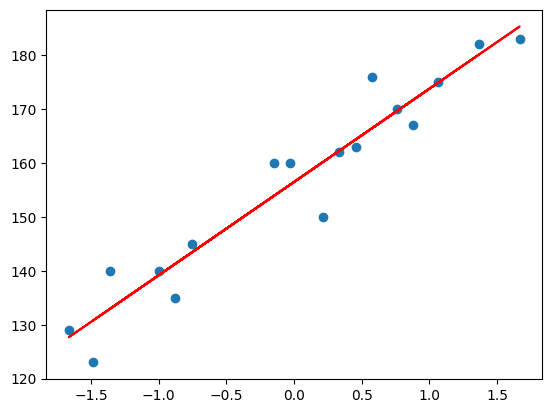

In [35]:
plt.scatter(Xtrain_scaled,ytrain)
plt.plot(Xtrain_scaled,linear_reg.predict(Xtrain_scaled),'r')

In [36]:
Y_pred_test=linear_reg.predict(Xtest_scaled)

In [37]:
Y_pred_test,ytest

(array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
        148.64197186, 190.55897293]),
 15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64)

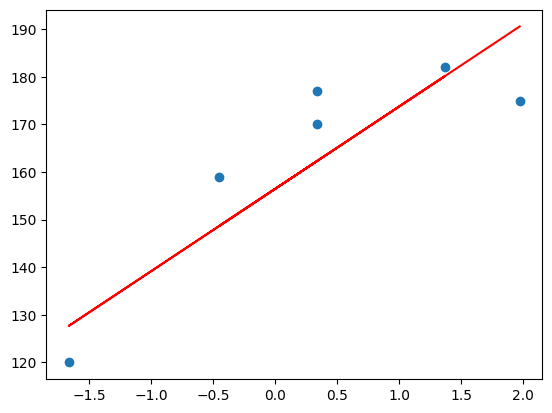

In [39]:
plt.scatter(Xtest_scaled,ytest)
plt.plot(Xtest_scaled,linear_reg.predict(Xtest_scaled),'r')

## Performanc MEtrics
## MSE,MAE,RMSE

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
mse=mean_squared_error(ytest,Y_pred_test)
mae=mean_absolute_error(ytest,Y_pred_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [43]:
from sklearn.metrics import r2_score

score=r2_score(ytest,Y_pred_test)

In [44]:
print(score)

0.7360826717981276


In [45]:
scaled_weights=scaler.transform([[80]])
scaled_weights

w:\anaconda\18-5-25\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [49]:
print(linear_reg.predict([scaled_weights[0]]))

[164.36084726]


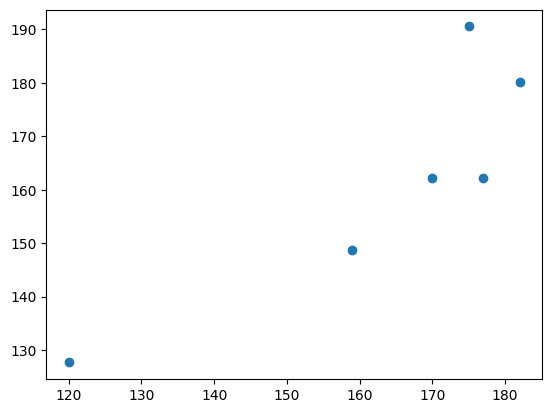

In [50]:
plt.scatter(ytest,Y_pred_test)

In [51]:
residuals=ytest,Y_pred_test
residuals

(15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64,
 array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
        148.64197186, 190.55897293]))

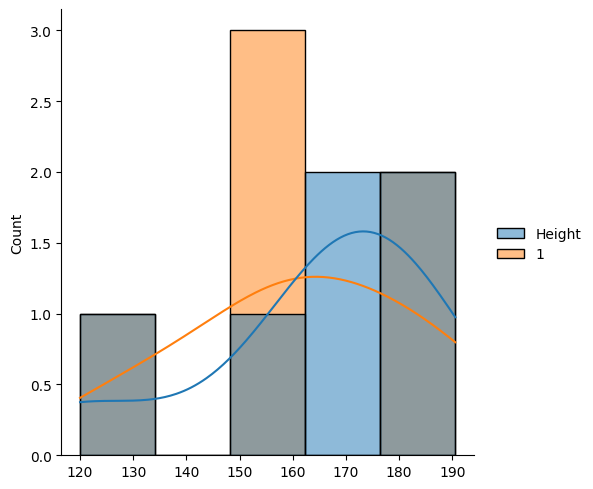

In [55]:
import seaborn as sns

sns.displot(residuals,kde=True)